In [1]:
from config import Config
from src.colors import bcolors
import pandas as pd

c = bcolors()
config = Config()
df = pd.read_csv(config.TRAIN_FILE)

# Load a sample Image

In [2]:
import numpy as np
import rasterio

img_path = config.TRAIN_MS_DIR + df['path'].values[0]
with rasterio.open(img_path) as src:
    image = np.array(src.read())
    
image = image[[3, 2, 1]].astype(np.float32)
rgb_min, rgb_max = image.min(), image.max()
image = (image - rgb_min) / (rgb_max - rgb_min)
image = image.clip(0, 1)
image = (image * 255).astype(np.uint8)

### Compute Hog Features

(64, 64)
(1568,)


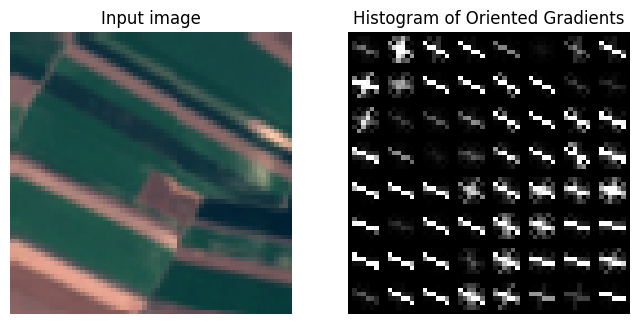

In [3]:
from src.feature_extraction import extract_hog_features
from skimage import exposure
import matplotlib.pyplot as plt

features, hog_img = extract_hog_features(image, return_img=True)
print(features.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image.transpose(1, 2, 0), cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### Compute Color Histogram Features

(3, 100)


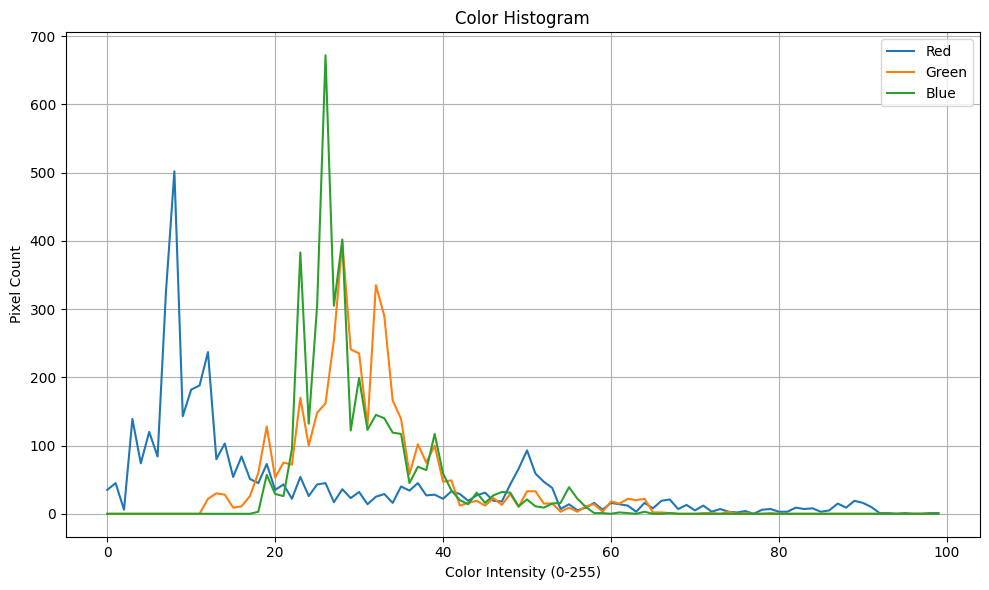

In [4]:
from src.feature_extraction import extract_color_hist

features = extract_color_hist(image)
print(features.shape)
# Channel labels
channel_labels = ['Red', 'Green', 'Blue']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histogram for each channel
for i, channel in enumerate(features):
    plt.plot(channel, label=channel_labels[i])
    plt.xlabel('Color Intensity')
    plt.ylabel('Pixel Count')
    plt.title('Color Histogram')
    plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()